## Discussion 4: String, Group, Joining Operations in Pandas

We will continue discussion of [Pandas](https://pandas.pydata.org/). In this discussion, you will learn about:

* String operations
* Groupby 
* Joining DataFrames

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import zipfile
from pathlib import Path
%matplotlib inline

import urllib.request
import os.path
import zipfile

data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "babynamesbystate.zip"
if not os.path.exists(local_filename): # if the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

ca_name = 'CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

babynames.head(5)

In [ ]:
elections = pd.read_csv("elections.csv")
elections.head(5)

### Question 1: Grouping Multiple Columns

Which of the following lines of code will output the following dataframe? Write your answer (hard-coded) as either 1, 2, 3, or 4. Recall that the arguments to `pd.pivot_table` are as follows: `data` is the input dataframe, `index` includes the values we use as rows, `columns` are the columns of the pivot table, `values` are the values in the pivot table, and `aggfunc` is the aggregation function that we use to aggregate `values`.

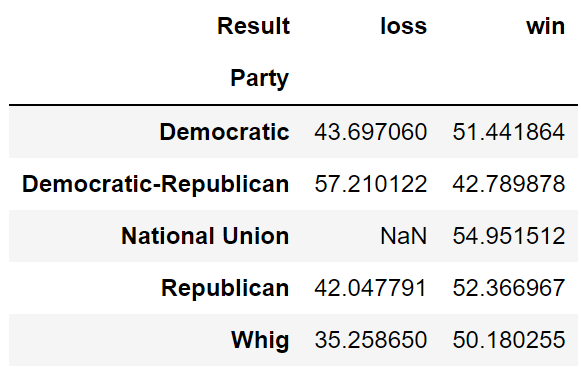

1) `pd.pivot_table(data=elections, index='Party', columns='Result', values='%', aggfunc=np.mean)`

2) `elections.groupby(['Party', 'Result'])['%'].mean()`

3) `pd.pivot_table(data=elections, index='Result', columns='Party', values='%', aggfunc=np.mean)`

4) `elections.groupby('%')[['Party', 'Result']].mean()`

### Question 1b

Consider the output of the `groupby.sum()` call below. Note that the resulting DataFrame is multi-indexed.

In [ ]:
name_counts_since_1940 = babynames[babynames["Year"] >= 1940].groupby(["Name", "Year"]).sum()
name_counts_since_1940.head(9)

Multi-indexed DataFrames can be a little confusing at first, but the ideas for using loc generalize pretty naturally. Examples below:

In [ ]:
name_counts_since_1940.loc['Aaiden':'Aakash']

In [ ]:
#Use both indices
name_counts_since_1940.loc[("Aaiden", 2011):("Aakash", 2000)]

Using `name_counts_since_1940`, set `imani_2013_count` equal to the number of babies born with the name 'Imani' in the year 2013. You may use either `.loc`. or `.query`. Make sure you're returning a value and not a Series or DataFrame

In [ ]:
imani_2013_count = ...

Note: Sometimes it's just useful to throw away the index and go back to having arbitrary numbers as an index. To do this, we use `reset_index()`.

In [ ]:
name_counts_since_1940_numerical_index = name_counts_since_1940.reset_index()
name_counts_since_1940_numerical_index.head(10)

### Question 2: String Operations and Table Joining

Create a new DataFrame called `elections_with_first_name` with a new column `First Name` that is equal to the Candidate's first name.

Hint: Use `.str.split`.

In [ ]:
elections_with_first_name = ...

By default `pd.merge` will only join on values that are common to both of the tables we are merging (inner join). Below is an example of joining `elections_with_first_name` with `name_counts_since_1940_numerical_index` only on the first names.

In [ ]:
elections_and_names_by_name = pd.merge(elections_with_first_name, name_counts_since_1940_numerical_index, left_on='First Name', right_on='Name')
elections_and_names_by_name.head(10)

Now create `elections_and_names` by joining the `elections_with_first_name` table with `name_counts_since_1940_numerical_index` on both the first names of each person along and the year.

In [ ]:
elections_and_names = ...

Below we make a crude plot of election winners and losers. According to this plot, since the 1970s, we haven't had a president with a name that was highly common in the year he was elected. 

Note that our data is a bit messy since, for example, Bill Clinton's name in the data set is "Bill", when in fact his legal name is William.

In [ ]:
elections_and_names.query("Result == 'win'").set_index("Year")["Count"].plot()
elections_and_names.query("Result == 'loss'").sort_values("%").groupby("Year")['Count'].last().plot()
plt.legend(["Winner", "Loser"]);